A central motivation for our approach is accurately identifying when the classifier ‘does not know’
the correct class. This problem, typically explored in the context of discriminative classification, is
known as selective classification [Geifman and El-Yaniv, 2017].

Suppose we have a classifier f which takes as input an image and outputs a predicted class along
with a measure of confidence in its prediction. For example, f could be a CNN with the maximum
softmax output as its confidence. Selective classifiers abstain from prediction if the confidence score
is below a certain threshold θ.

The threshold parameter thus offers a balance between the proportion of the data classified and the
accuracy on this portion of the dataset. 

The coverage of a selective classifier with threshold θ is
defined as the proportion of test observations that are classified with confidence greater than θ [ElYaniv and Wiener, 2010]. 

The empirical risk given θ is then defined as the error rate on the subset
of the test set that was classified with confidence greater than θ. 

A principled method for comparing
selective classifiers is to examine their risk-coverage plots, as exemplified in Figure 1. Classifiers
with meaningful measures of confidence should predict difficult or out of distribution images with
lower confidence, and thus, as the coverage is decreased, the risk should shrink to zero.
Recently, Geifman and El-Yaniv [2017] showed that for discriminatively-trained CNNs, thresholding the softmax output provides state-of-the-art selective classification, surpassing alternative confidence measures such as MC-Dropout [Gal and Ghahramani, 2016].

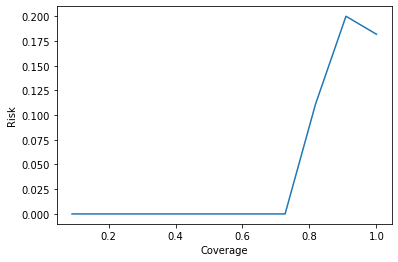

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def risk_coverage(scores, pred_labels, gt_labels):
    scores_ = np.array(scores)
    pred_labels_ = np.array(pred_labels)
    gt_labels_ = np.array(gt_labels)
     
    coverage = []
    risk = []
    for theta in scores_:
        mask = scores_ >= theta  # TODO: >= or > ? Doing >= so that risk is defined when coverage == 0
        
        coverage.append(len(scores_[mask]) / len(scores_))
    
        pl = pred_labels_[mask]
        gl = gt_labels_[mask]
        risk.append(sum(pl != gl) / len(gl))
            
    return coverage, risk
  
    
def plot_risk_coverage(*args):
    c, r = risk_coverage(*args)
    
    plt.figure()
    plt.plot(c, r)
    plt.ylabel("Risk")
    plt.xlabel("Coverage")
    plt.show()
    
plot_risk_coverage(scores, pred_labels, gt_labels)

In [97]:
scores = [x/10 for x in range(11)]
gt_labels = [1 for x in range(11)]
pred_labels = [1 for x in range(11)]
pred_labels[1] = 0
pred_labels[2] = 0

In [98]:
scores

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [99]:
gt_labels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [100]:
pred_labels

[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]